# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

cast_df = pd.read_csv("cast.csv")
release_dates_df = pd.read_csv("release_dates.csv")
titles_df = pd.read_csv("titles.csv")

### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

In [2]:
cast_data = {
    "records": cast_df.shape[0],
    "columns": list(cast_df.columns),
    "data_types": cast_df.dtypes.to_dict(),
    "missing_values": cast_df.isnull().sum().to_dict()
}

release_dates_data = {
    "records": release_dates_df.shape[0],
    "columns": list(release_dates_df.columns),
    "data_types": release_dates_df.dtypes.to_dict(),
    "missing_values": release_dates_df.isnull().sum().to_dict()
}

titles_data = {
    "records": titles_df.shape[0],
    "columns": list(titles_df.columns),
    "data_types": titles_df.dtypes.to_dict(),
    "missing_values": titles_df.isnull().sum().to_dict()
}

cast_data, release_dates_data, titles_data

({'records': 3442902,
  'columns': ['title', 'year', 'name', 'type', 'character', 'n'],
  'data_types': {'title': dtype('O'),
   'year': dtype('int64'),
   'name': dtype('O'),
   'type': dtype('O'),
   'character': dtype('O'),
   'n': dtype('float64')},
  'missing_values': {'title': 0,
   'year': 0,
   'name': 0,
   'type': 0,
   'character': 0,
   'n': 1327783}},
 {'records': 443486,
  'columns': ['title', 'year', 'country', 'date'],
  'data_types': {'title': dtype('O'),
   'year': dtype('int64'),
   'country': dtype('O'),
   'date': dtype('O')},
  'missing_values': {'title': 0, 'year': 0, 'country': 0, 'date': 0}},
 {'records': 226013,
  'columns': ['title', 'year'],
  'data_types': {'title': dtype('O'), 'year': dtype('int64')},
  'missing_values': {'title': 0, 'year': 0}})

### 2. How many movies have the title North by Northwest

In [3]:
no_of_movies_by_title = titles_df[titles_df['title'] == 'North by Northwest']

no_of_movies_by_title

,title,year
201761,North by Northwest,1959


### 3. How many version of Hamlet are there, when was the first made? the last?

In [6]:
no_of_hamlet_movies = titles_df[titles_df['title'] == 'Hamlet']

hamlet_version_count = no_of_hamlet_movies.shape[0]

first_hamlet_year = no_of_hamlet_movies['year'].min()
last_hamlet_year = no_of_hamlet_movies['year'].max()

hamlet_version_count, first_hamlet_year, last_hamlet_year

(20, 1910, 2017)

### 4. List all the movies called Treasure Island from oldest to newest

In [8]:
treasure_island_movies = titles_df[titles_df['title'] == 'Treasure Island'].sort_values(by='year')

treasure_island_movies

,title,year
180911,Treasure Island,1918
108853,Treasure Island,1920
87953,Treasure Island,1934
126321,Treasure Island,1950
190233,Treasure Island,1972
122150,Treasure Island,1973
52099,Treasure Island,1985
36752,Treasure Island,1999


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [10]:
movies_in_1950 = titles_df[titles_df['year'] == 1950].shape[0]
movies_in_1980 = titles_df[titles_df['year'] == 1980].shape[0]
movies_in_2000 = titles_df[titles_df['year'] == 2000].shape[0]

movies_in_1950, movies_in_1980, movies_in_2000

(1109, 1750, 2568)

### 6. How big was the cast of Metropolis


In [11]:
metropolis_cast_size = cast_df[cast_df['title'] == 'Metropolis'].shape[0]

metropolis_cast_size

33

### 7. How many roles for actors were there 1950's? 1990's

In [12]:
roles_1950s = cast_df[(cast_df['year'] >= 1950) & (cast_df['year'] < 1960) & (cast_df['type'] == 'actor')].shape[0]
roles_1990s = cast_df[(cast_df['year'] >= 1990) & (cast_df['year'] < 2000) & (cast_df['type'] == 'actor')].shape[0]

roles_1950s, roles_1990s

(153559, 245713)

### 8. How many roles for actors & actresses over time? Output should be a line graph

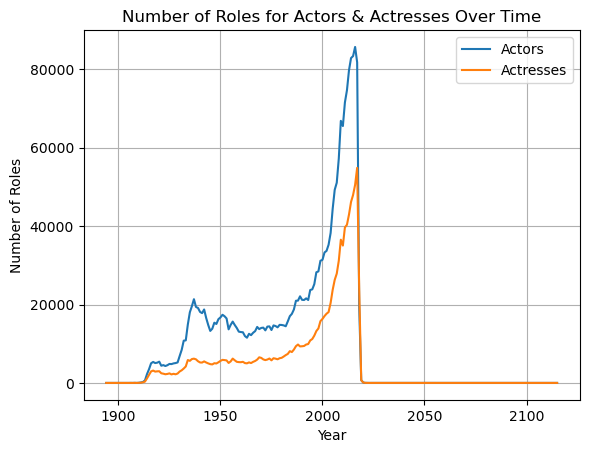

In [13]:
roles_over_time = cast_df.groupby(['year', 'type']).size().unstack().fillna(0)

plt.plot(roles_over_time.index, roles_over_time['actor'], label='Actors')
plt.plot(roles_over_time.index, roles_over_time['actress'], label='Actresses')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.title('Number of Roles for Actors & Actresses Over Time')
plt.legend()
plt.grid(True)
plt.show()

### 9. How many "leading roles" were there in the 2000's?

In [14]:
leading_roles_2000s = cast_df[(cast_df['year'] >= 2000) & (cast_df['year'] < 2010) & (cast_df['n'] == 1)].shape[0]

leading_roles_2000s

23593

### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [15]:
no_ranking_2000s = cast_df[(cast_df['year'] >= 2000) & (cast_df['year'] < 2010) & (cast_df['n'].isna())].shape[0]
no_ranking_1950s = cast_df[(cast_df['year'] >= 1950) & (cast_df['year'] < 1960) & (cast_df['n'].isna())].shape[0]

no_ranking_2000s, no_ranking_1950s

(232037, 95406)

### There is a substantial increase in the number of unranked roles in the 2000s compared to the 1950s. This could suggest that more films and television shows were being produced, or that cast lists became more comprehensive over time, including a larger number of uncredited or minor roles.


### 11. Plot the number of films made in each decade

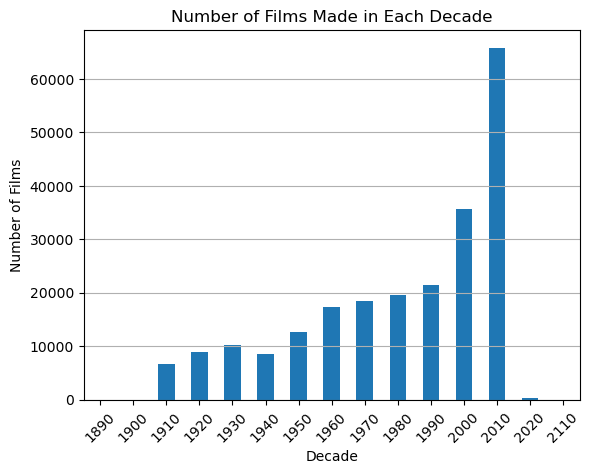

In [16]:
# Creating a new column for decade
titles_df['decade'] = (titles_df['year'] // 10) * 10

films_per_decade = titles_df.groupby('decade').size()

films_per_decade.plot(kind='bar')
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.title('Number of Films Made in Each Decade')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### 12. Plot the number of films with a Rustler character over time

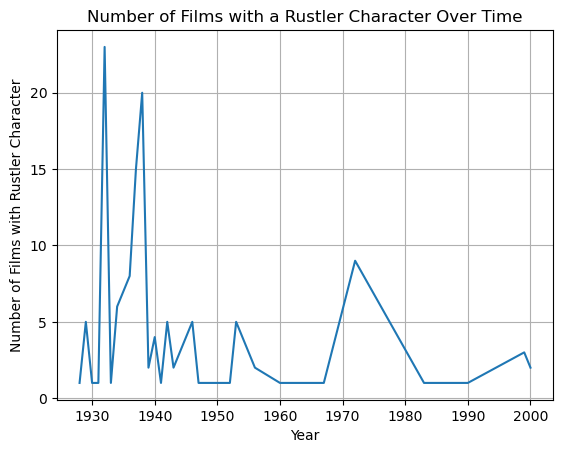

In [17]:
rustler_roles = cast_df[cast_df['character'] == 'Rustler'].groupby('year').size()

rustler_roles.plot()
plt.xlabel('Year')
plt.ylabel('Number of Films with Rustler Character')
plt.title('Number of Films with a Rustler Character Over Time')
plt.grid(True)
plt.show()

### 13. What are the top ten character names of all time?

In [18]:
top_ten_characters = cast_df['character'].value_counts().head(10)

top_ten_characters

Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Name: character, dtype: int64

### 14. Which actor appeared in the most films in the 1990's decade?

In [19]:
actors_1990s = cast_df[(cast_df['year'] >= 1990) & (cast_df['year'] < 2000) & (cast_df['type'] == 'actor')]

most_films_actor_1990s = actors_1990s['name'].value_counts().idxmax()
most_films_count_1990s = actors_1990s['name'].value_counts().max()

most_films_actor_1990s, most_films_count_1990s

('Shakti Kapoor', 143)

### 15. What are the top 10 roles that start with Science?

In [20]:
cast_df['character'] = cast_df['character'].fillna('')

characters_starting_with_science = cast_df[cast_df['character'].str.startswith('Science')]['character'].value_counts().head(10)
characters_starting_with_science

Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Kid              5
Science Fair Kid         5
Science Reporter         5
Science                  4
Science Officer          3
Science teacher          3
Name: character, dtype: int64

### 16. What film has the largest cast

In [21]:
largest_cast = cast_df.groupby(['title', 'year']).size().idxmax()
largest_cast_size = cast_df.groupby(['title', 'year']).size().max()

largest_cast, largest_cast_size

(('Around the World in 80 Days', 1956), 1299)

### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [22]:
cast_size = cast_df.groupby(['title', 'year']).size()


cast_size_descriptive_stats = cast_size.describe()

cast_size_descriptive_stats


count    182498.000000
mean         18.865423
std          21.241210
min           1.000000
25%           6.000000
50%          13.000000
75%          24.000000
max        1299.000000
dtype: float64

## Count: There are 182,498 entries (movies, shows, etc.), which means cast size data was collected from a large number of titles.

## Mean: The average cast size is about 18.865, which suggests that on average, there are around 19 cast members per title.

## Standard Deviation (std): With a standard deviation of approximately 21.24, there is a high variability in the cast sizes among different titles. This implies a diverse range of cast sizes, with some titles having very few cast members and others having a large ensemble.

## Minimum (min): The smallest cast size is 1, indicating that there are titles with only a single cast member listed.

## 25th Percentile: 25% of the titles have a cast size of 6 or fewer members, which might represent smaller productions or titles with a more focused set of characters.

## Median (50%): The median cast size is 13, which is lower than the mean, suggesting that the distribution of cast sizes is right-skewed with more titles having smaller casts and fewer titles with very large casts.

## 75th Percentile: 75% of the titles have a cast size of 24 or fewer. This further indicates that larger casts are less common.

### 18. How many films has Natalie Portman been in in each year throughout her career?

In [23]:
natalie_portman_films_per_year = cast_df[cast_df['name'] == 'Natalie Portman'].groupby('year').size()

natalie_portman_films_per_year

year
1995    1
1996    3
1999    3
2000    1
2001    1
2002    1
2003    1
2004    2
2005    4
2006    2
2007    3
2008    1
2009    2
2010    4
2011    3
2013    1
2015    4
2016    3
2017    1
dtype: int64

### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

In [24]:
natalie_portman_top_co_star_films_per_year = cast_df[(cast_df['name'] == 'Natalie Portman') & (cast_df['n'] <= 2)].groupby('year').size()

natalie_portman_top_co_star_films_per_year

year
1999    1
2000    1
2002    1
2005    3
2006    2
2007    1
2008    1
2009    1
2010    2
2011    2
2013    1
2015    2
2016    2
dtype: int64

### 20. Determine how many roles for actor or actress by decade. Plot the output 

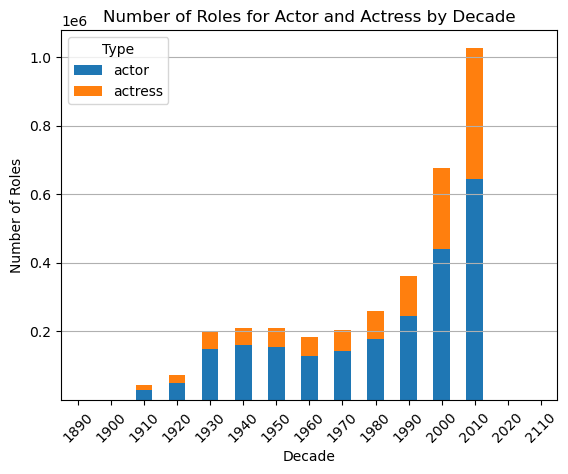

In [25]:
cast_df['decade'] = (cast_df['year'] // 10) * 10
roles_by_decade = cast_df.groupby(['decade', 'type']).size().unstack().fillna(0)

roles_by_decade.plot(kind='bar', stacked=True)
plt.xlabel('Decade')
plt.ylabel('Number of Roles')
plt.title('Number of Roles for Actor and Actress by Decade')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.grid(axis='y')
plt.show()

### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

In [26]:
release_dates_df['date'] = pd.to_datetime(release_dates_df['date'])

release_dates_df['day_of_week'] = release_dates_df['date'].dt.day_name()
release_dates_df['month'] = release_dates_df['date'].dt.month_name()
pivot_table_release = pd.pivot_table(release_dates_df, index='day_of_week', columns='month', aggfunc='size', fill_value=0)
pivot_days = pd.pivot_table(release_dates_df, index='day_of_week', aggfunc='count', values='title')
pivot_months = pd.pivot_table(release_dates_df, index='month', aggfunc='count', values='title')
pivot_table_release,pivot_days, pivot_months

(month        April  August  December  February  January   July   June  March  \
 day_of_week                                                                    
 Friday       13559   13430     13020     13833    13734  11635  11997  15268   
 Monday        3168    2844      3240      3138     3699   2267   2337   3383   
 Saturday      2868    2277      3357      2395     2925   2291   2409   2742   
 Sunday        1358    1138      1813      1277     1822    894   1031   1228   
 Thursday     10625    9931     10666     10356    10746   8947   9469  11844   
 Tuesday       1446    1121      1903      1190     1823   1144   1179   1313   
 Wednesday     4650    4270      5097      4118     4663   4243   4282   4479   
 
 month          May  November  October  September  
 day_of_week                                       
 Friday       13198     14084    14893      14523  
 Monday        3050      3372     3551       3161  
 Saturday      2270      2547     2700       2551  
 Sunday  

### Friday Releases: Movies are predominantly released on Fridays. This trend is consistent across all months, with Friday being the day with the most releases. This is a common practice in many film industries as it leads into the weekend, when audiences are more likely to go to the cinema.

### Midweek Releases: Wednesday also sees a relatively high number of releases, which might be indicative of a strategy to capture audiences during midweek, perhaps for special screenings or to gain a head start on the weekend box office.

### Least Popular Days: Sunday appears to be the least popular day for releases. This could be due to the fact that box office takings are typically counted from Friday through Sunday, so a Sunday release may not fully capitalize on the opening weekend potential.

### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

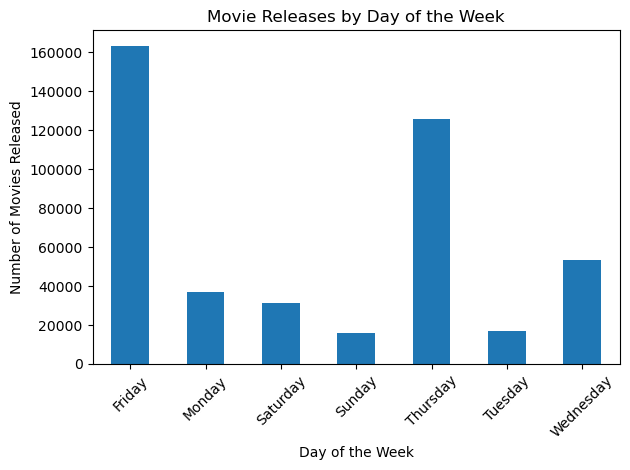

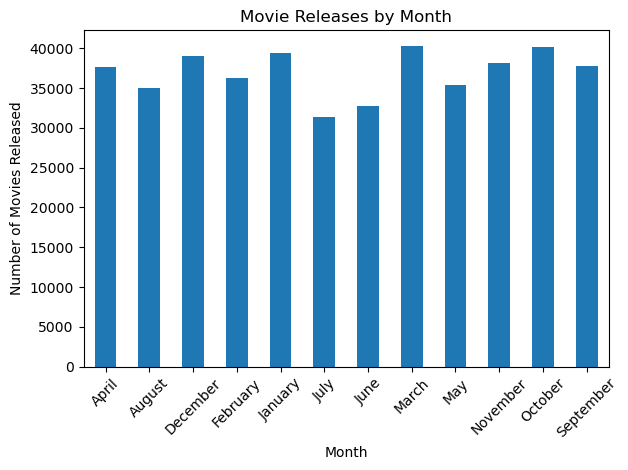

In [27]:
pivot_days['title'].plot(kind='bar')
plt.title('Movie Releases by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Movies Released')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


pivot_months['title'].plot(kind='bar')
plt.title('Movie Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies Released')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

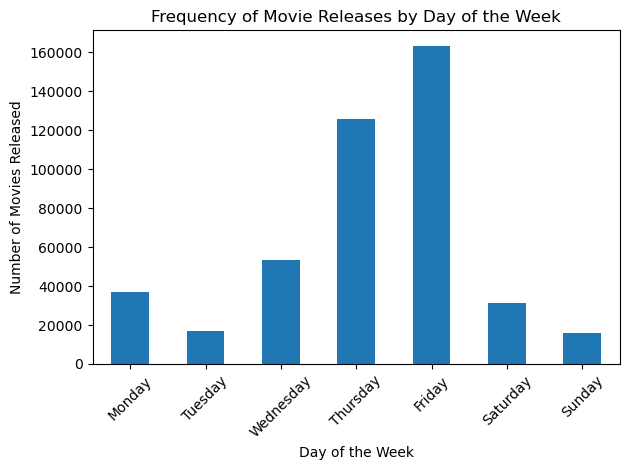

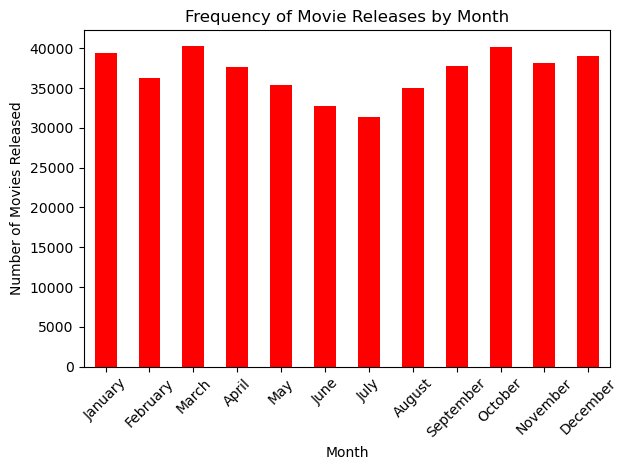

In [36]:
pivot_days_sorted = pivot_days.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
pivot_days_sorted.plot(kind='bar', legend=False)
plt.title('Frequency of Movie Releases by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Movies Released')
plt.xticks(rotation=45)
plt.tight_layout()


months_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
pivot_months_sorted = pivot_months.reindex(months_order)
pivot_months_sorted.plot(kind='bar', color='red', legend=False)
plt.title('Frequency of Movie Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies Released')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### 23. What films did actors in Star Wars go on to appear in? 

In [28]:
star_wars_cast = cast_df[cast_df['title'] == 'Star Wars']
star_wars_actors = star_wars_cast['name'].unique()

films_with_star_wars_actors = cast_df[(cast_df['name'].isin(star_wars_actors)) & (cast_df['title'] != 'Star Wars')]
films_with_star_wars_actors[['name', 'title', 'year']].drop_duplicates().head()

,name,title,year
59905,David Ankrum,Every Little Crook and Nanny,1972
59906,David Ankrum,Linda Lovelace for President,1975
59907,David Ankrum,Rogue One,2016
59908,David Ankrum,Smorgasbord,1983
59910,David Ankrum,The Roommates,1973
